[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

In [65]:
%mv /Users/joyson/Downloads/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20220122061735.csv ./data/

mv: /Users/joyson/Downloads/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20220122061735.csv: No such file or directory


## 필요 라이브러리 가져오기

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")

In [114]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [115]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20220122061735.csv", encoding="cp949")
df_raw.shape

(450, 27)

In [116]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [117]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [118]:
df_raw

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,749612,858240,833672,897205,921586,974060,1251122,1345723,1526135,1881628
1,합계,합계,면세점,-,-,-,-,-,-,-,...,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,138982,180356,168059,171886,159750,203404,180429,188565,189763,225993
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,2018,2158,5236,3854,4320,4511,3702,4038,3670,3827
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,5,1,2,6,1,215,2,0,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,...,567,634,665,469,504,589,465,488,308,531
447,기타,기 타,계,765,735,849,804,788,805,724,...,814,1101,1067,1063,1120,770,711,689,469,1094
448,기타,기 타,면세점,-,-,-,-,-,-,-,...,82,266,272,316,404,0,0,1,0,1


In [119]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4'],
      dtype='object')

In [120]:
df_raw.values

array([['합계', '합계', '계', ..., 1345723, 1526135, 1881628],
       ['합계', '합계', '면세점', ..., 1157158, 1336372, 1655635],
       ['합계', '합계', '면세점 이외', ..., 188565, 189763, 225993],
       ...,
       ['기타', '기 타', '계', ..., 689, 469, 1094],
       ['기타', '기 타', '면세점', ..., 1, 0, 1],
       ['기타', '기 타', '면세점 이외', ..., 688, 469, 1093]], dtype=object)

In [121]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], 
                 var_name="기간", value_name="million")
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531
10797,기타,기 타,계,2019 4/4,1094
10798,기타,기 타,면세점,2019 4/4,1


In [122]:
df.shape

(10800, 5)

In [123]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   million  10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


## 데이터 전처리
### 기간에서 연도를 분리하기

In [125]:
df["기간"]

0        2014 1/4
1        2014 1/4
2        2014 1/4
3        2014 1/4
4        2014 1/4
           ...   
10795    2019 4/4
10796    2019 4/4
10797    2019 4/4
10798    2019 4/4
10799    2019 4/4
Name: 기간, Length: 10800, dtype: object

In [126]:
int("2019 4/4".split()[0])

2019

In [127]:
df["기간"].map(lambda x: int(x.split()[0]))

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
10795    2019
10796    2019
10797    2019
10798    2019
10799    2019
Name: 기간, Length: 10800, dtype: int64

In [128]:
df["연도"] = df["기간"].map(lambda x: int(x.split()[0]))
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014
...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0,2019
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531,2019
10797,기타,기 타,계,2019 4/4,1094,2019
10798,기타,기 타,면세점,2019 4/4,1,2019


In [129]:
type(int("2019 3/4 p)".split()[1].split("/")[0]))

int

In [130]:
df["분기"] = df["기간"].apply(lambda  x : int(x.split()[1].split("/")[0]))
#df["분기"] = df["분기"].astype(int)
#df["연도"] = df["연도"].astype(int)
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531,2019,4
10797,기타,기 타,계,2019 4/4,1094,2019,4
10798,기타,기 타,면세점,2019 4/4,1,2019,4


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [131]:
df["million"] = df["million"].replace("-", pd.np.nan).astype(float)
df["million"]
df

<ipython-input-131-43acd5e4aa8e>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df["million"] = df["million"].replace("-", pd.np.nan).astype(float)


,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   million  7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


### 필요없는 데이터 제거하기

In [133]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") &  (df["상품군별"] != "합계") ].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   million  6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [135]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

In [136]:
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


In [137]:
df_total = df[df["판매유형별"]=="계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='million'>

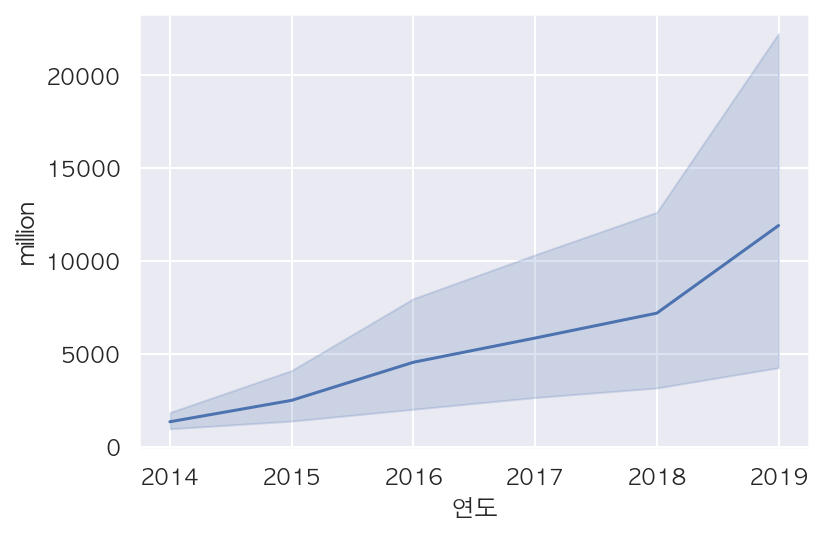

In [138]:
# 연도, 판매액 lineplot으로 그리기
sns.lineplot(data=df_total, x="연도", y="million")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

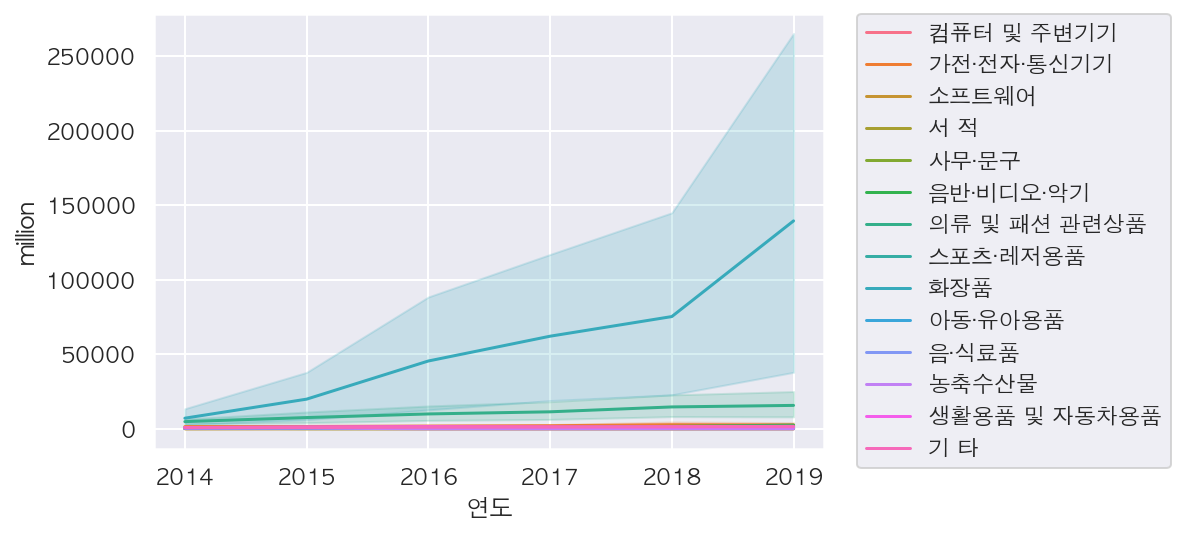

In [139]:
# 연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시하기
sns.lineplot(data=df_total, x="연도", y="million", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

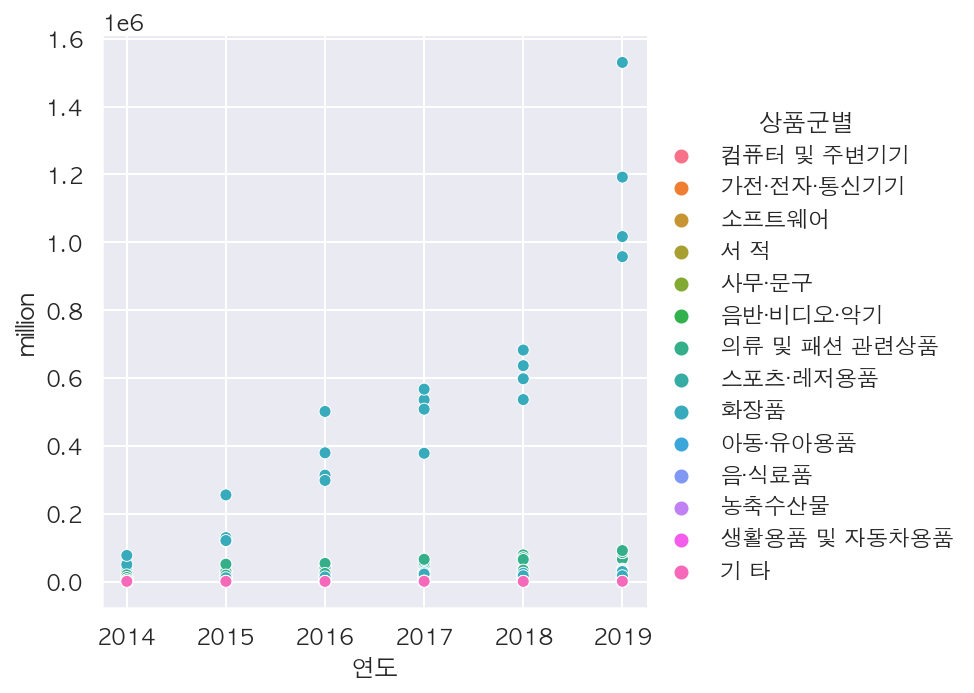

In [140]:
sns.relplot(data=df_total, x="연도", y="million", hue="상품군별")

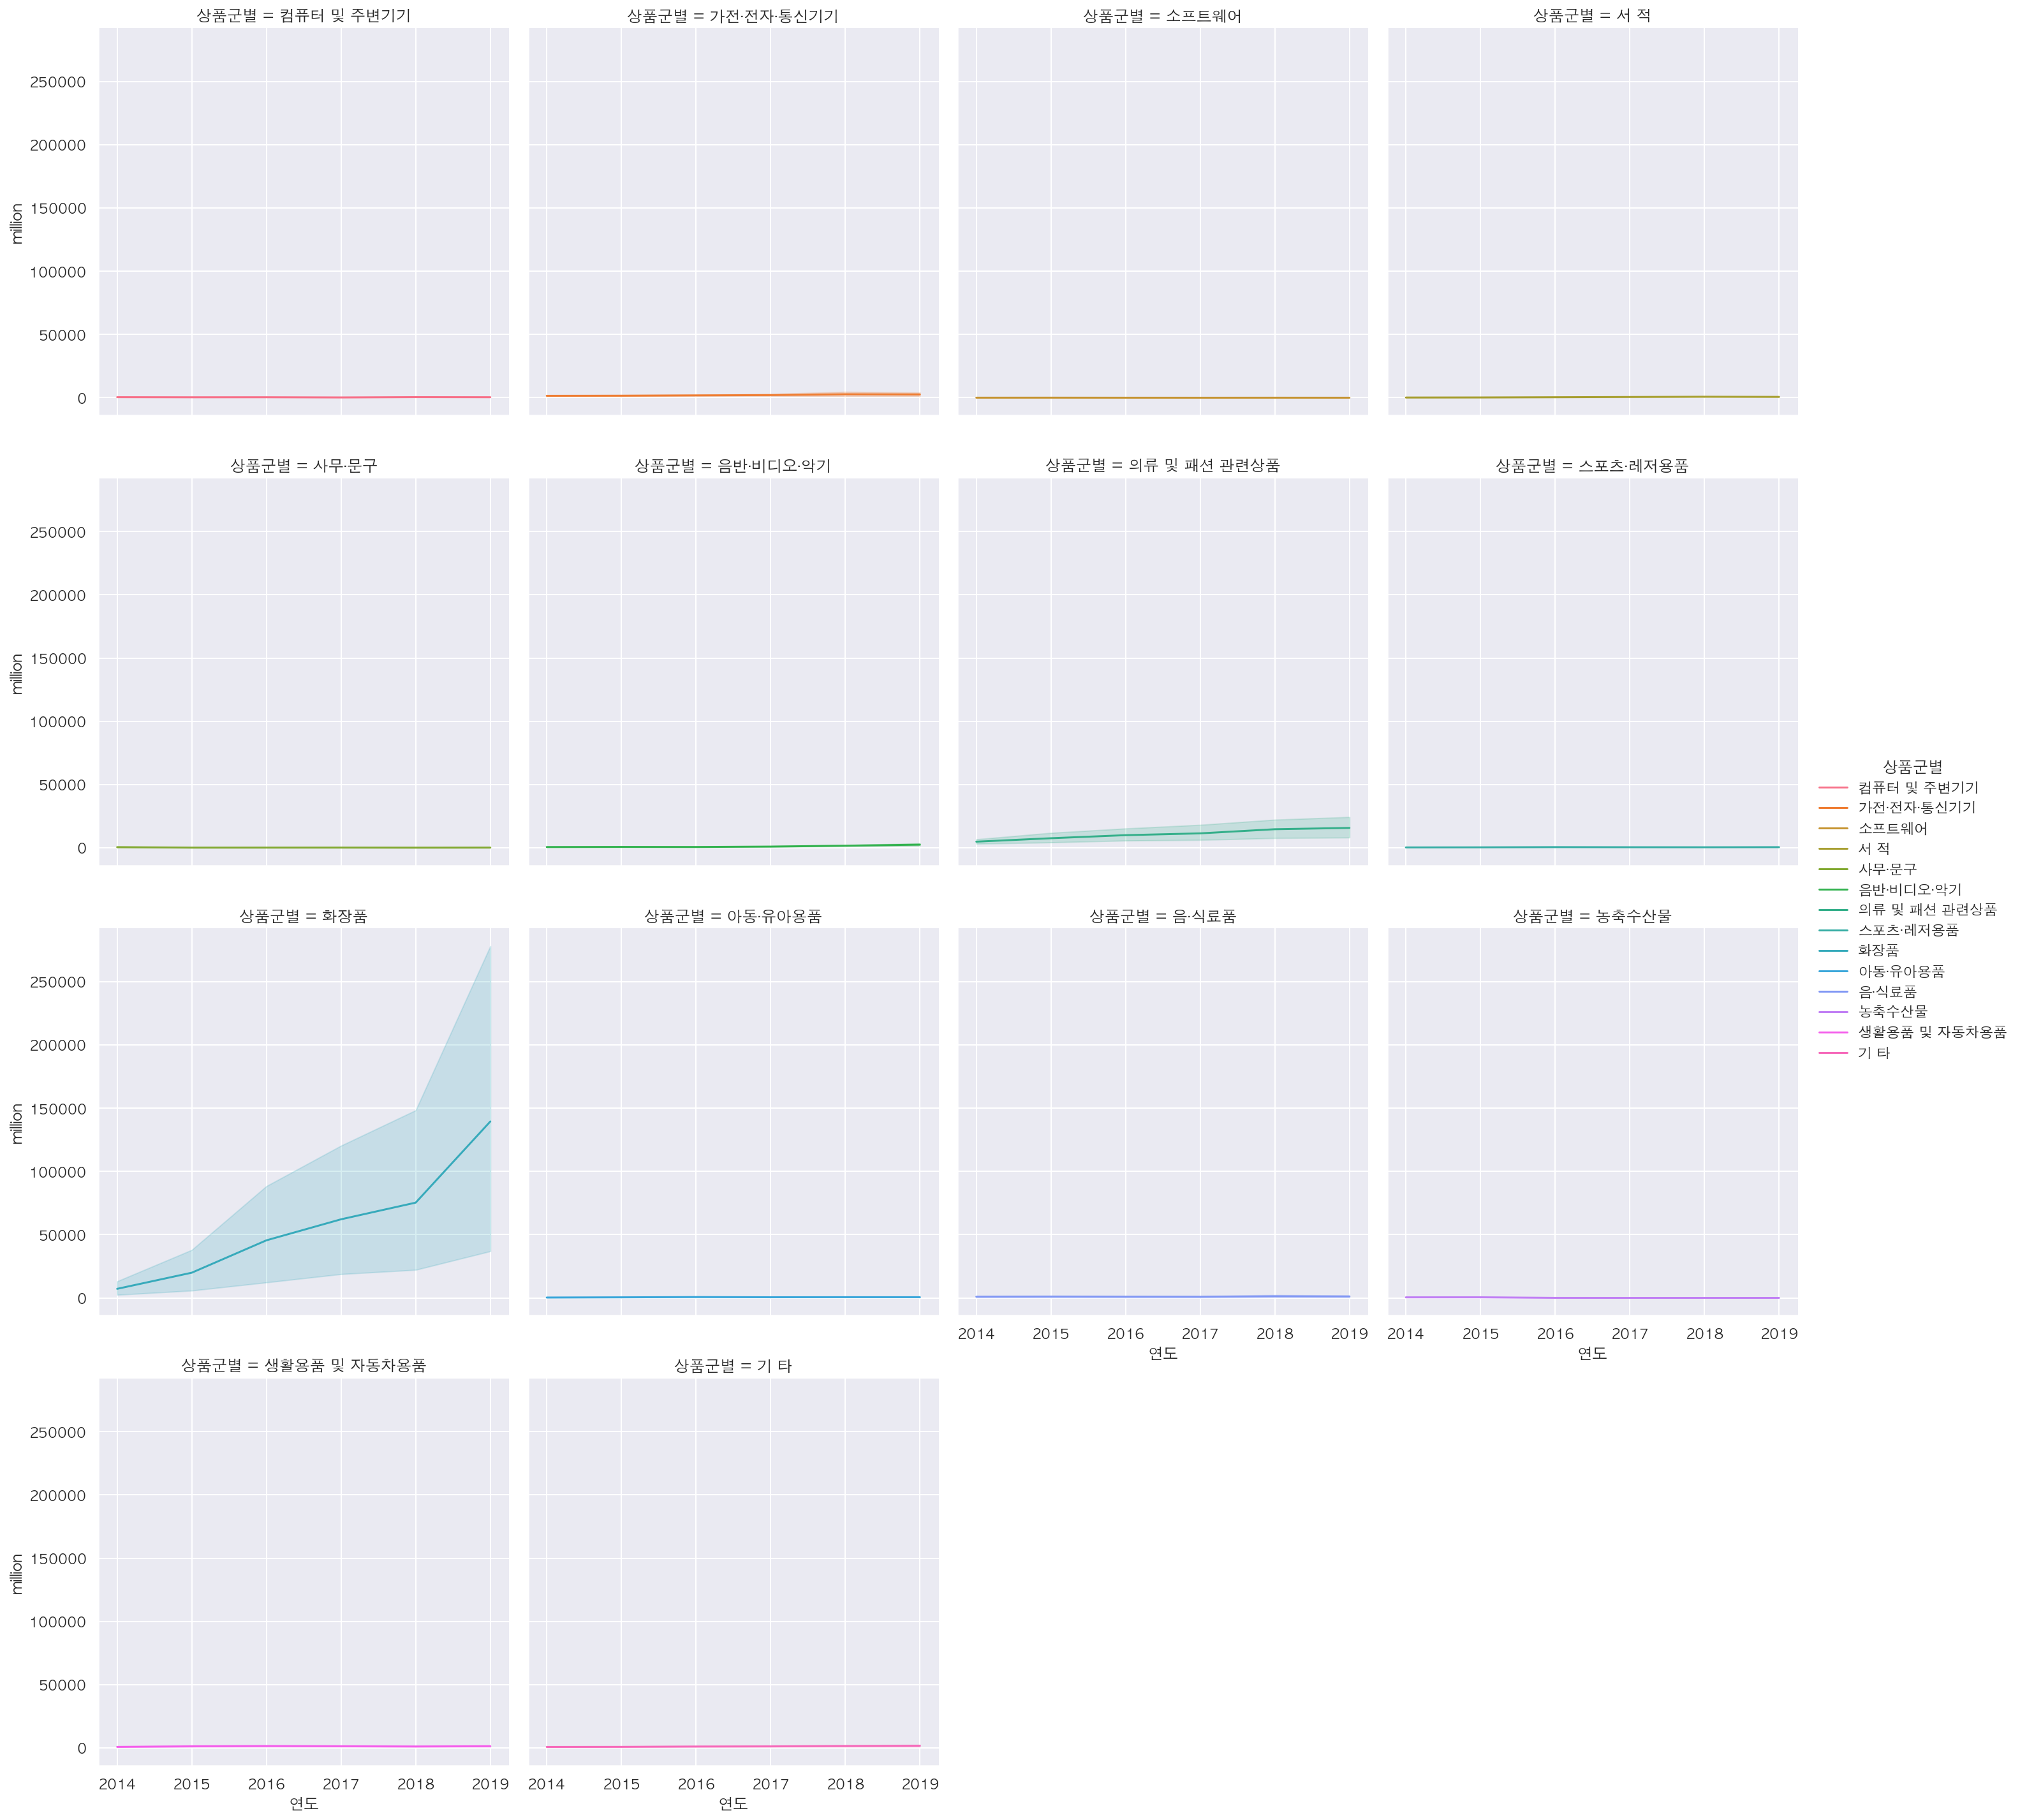

In [146]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기
sns.relplot(data=df_total, x="연도", y="million", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [176]:
# isin을 사용해 화장품만 제외를 하고 df_sub 이라는 변수에 담습니다. + 의류포함
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련상품"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4,193.0,2019,4
10788,기타,음·식료품,계,2019 4/4,319.0,2019,4
10791,기타,농축수산물,계,2019 4/4,2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4,531.0,2019,4


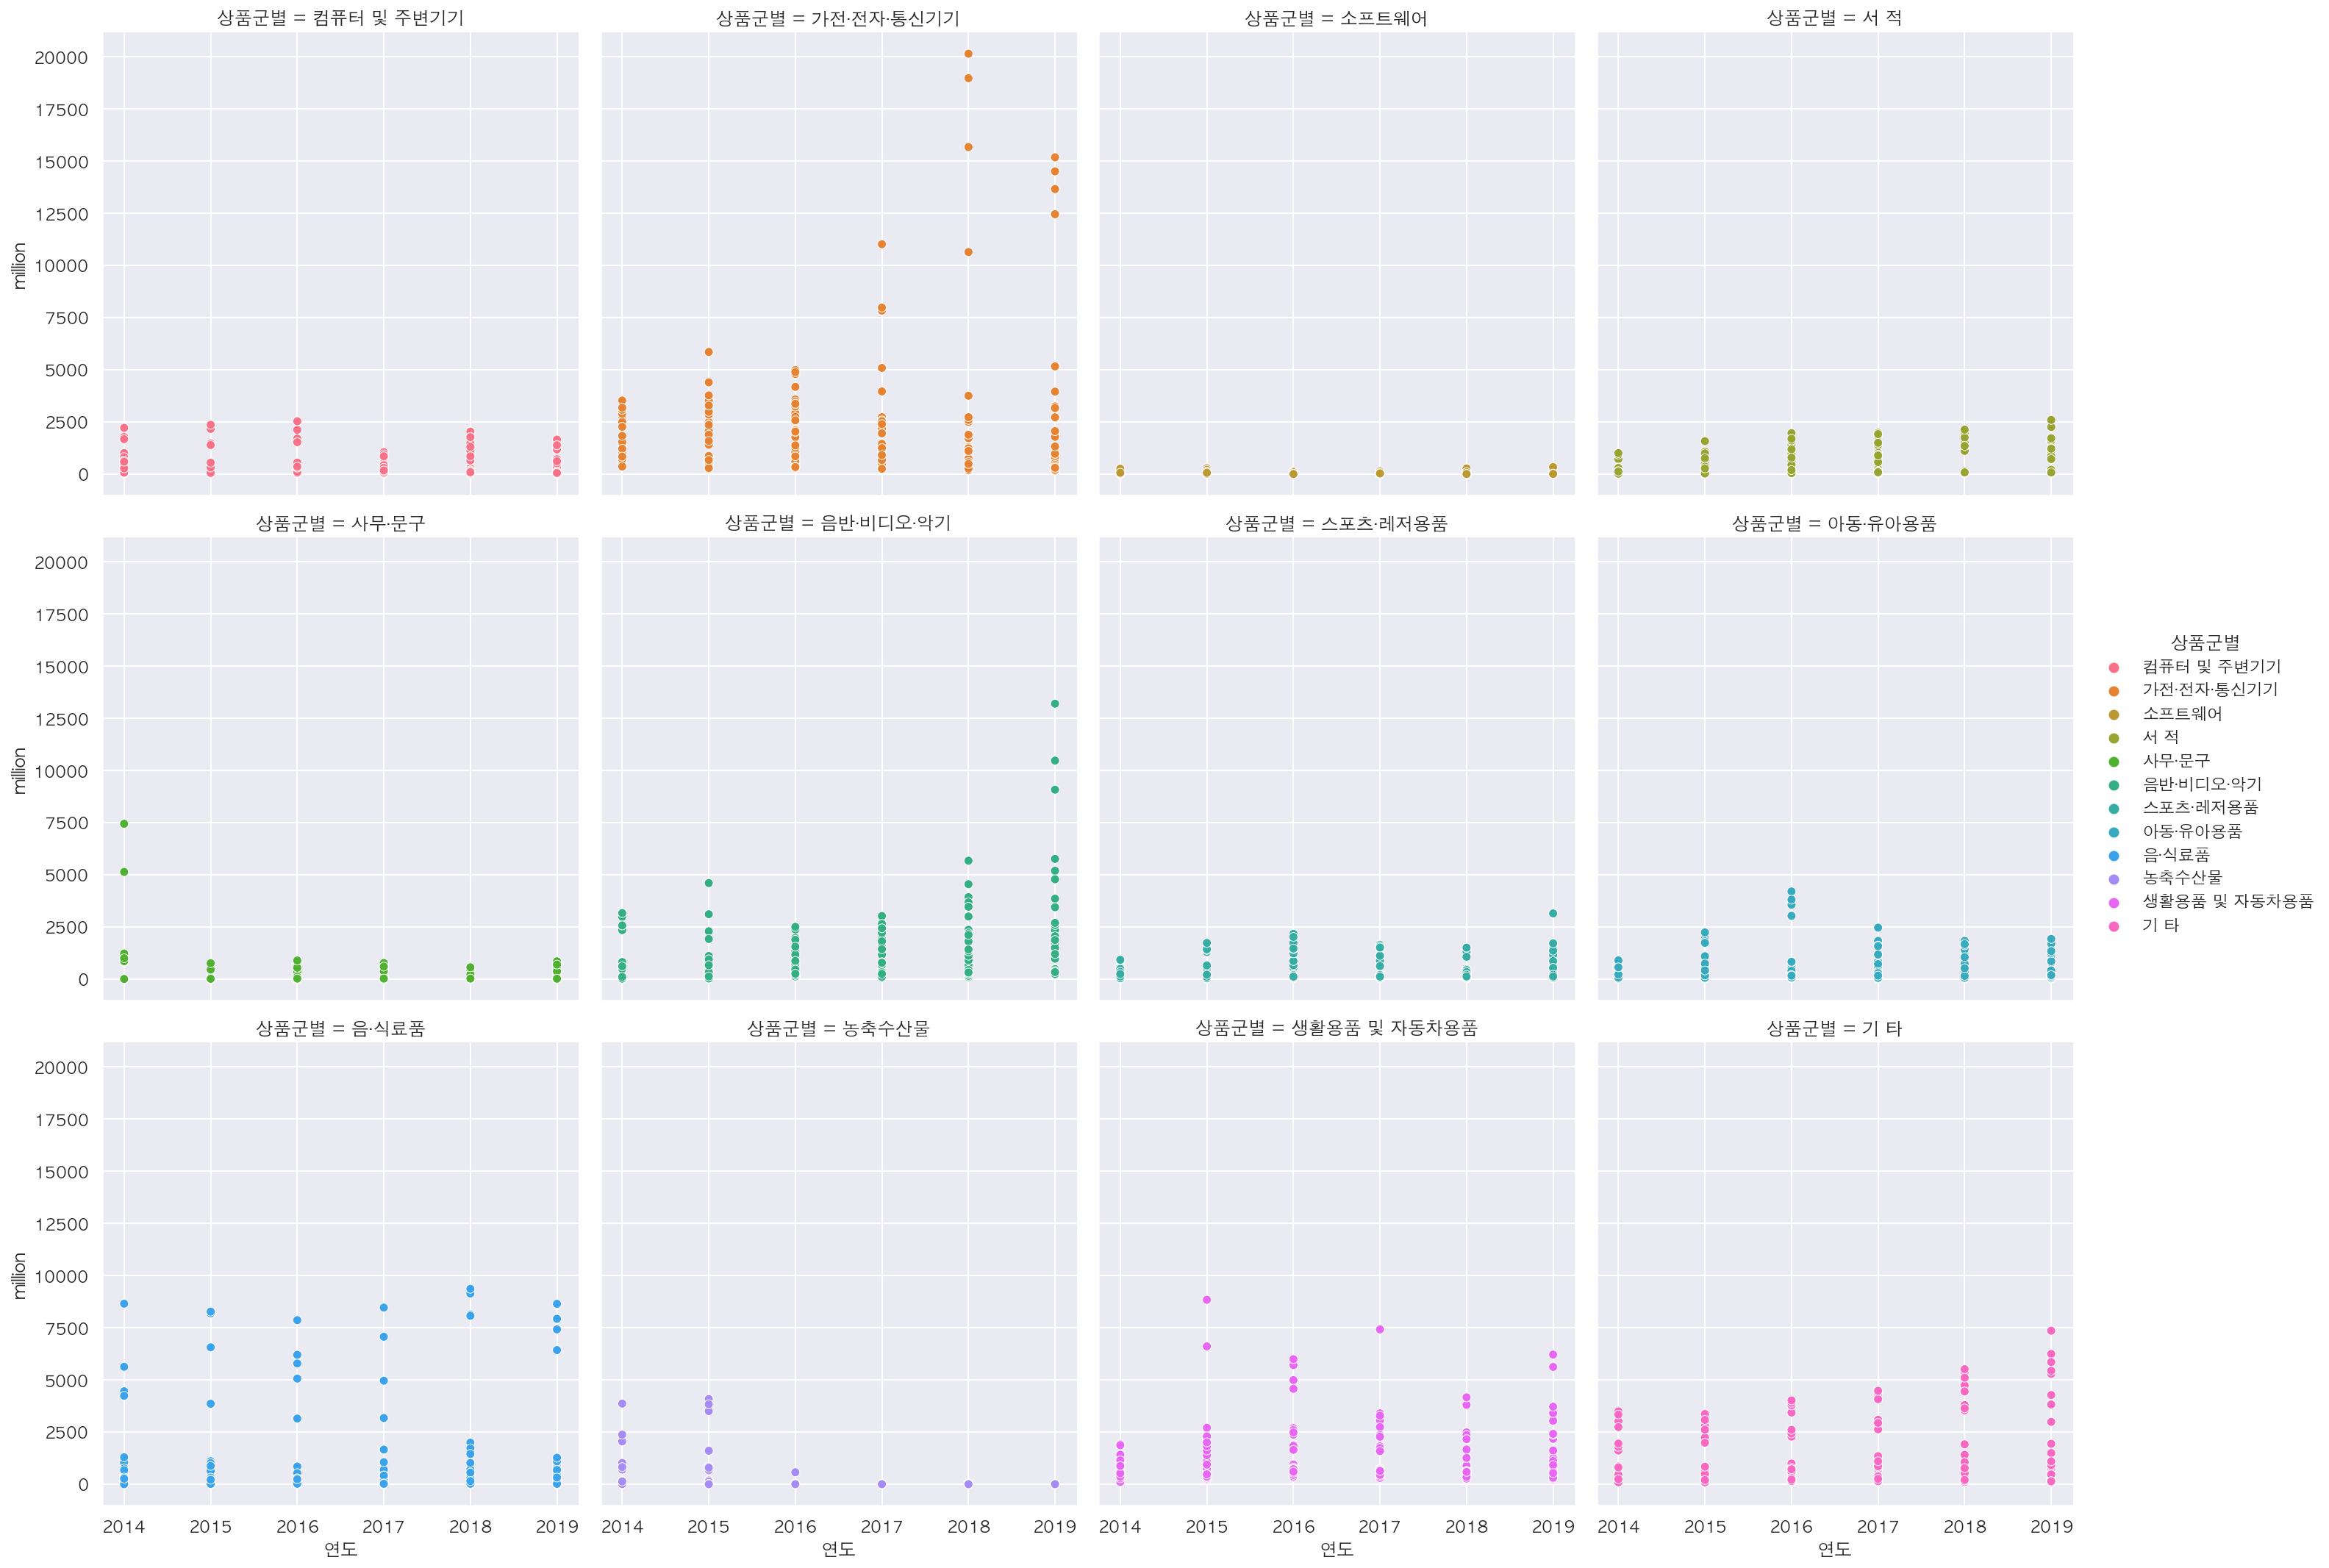

In [177]:
# 연도별 판매액을 상품군별로 relplot을 활용해 서브플롯으로 그려보기
sns.relplot(data=df_sub, x="연도", y="million", hue="상품군별", col="상품군별", col_wrap=4) # default = scatter 

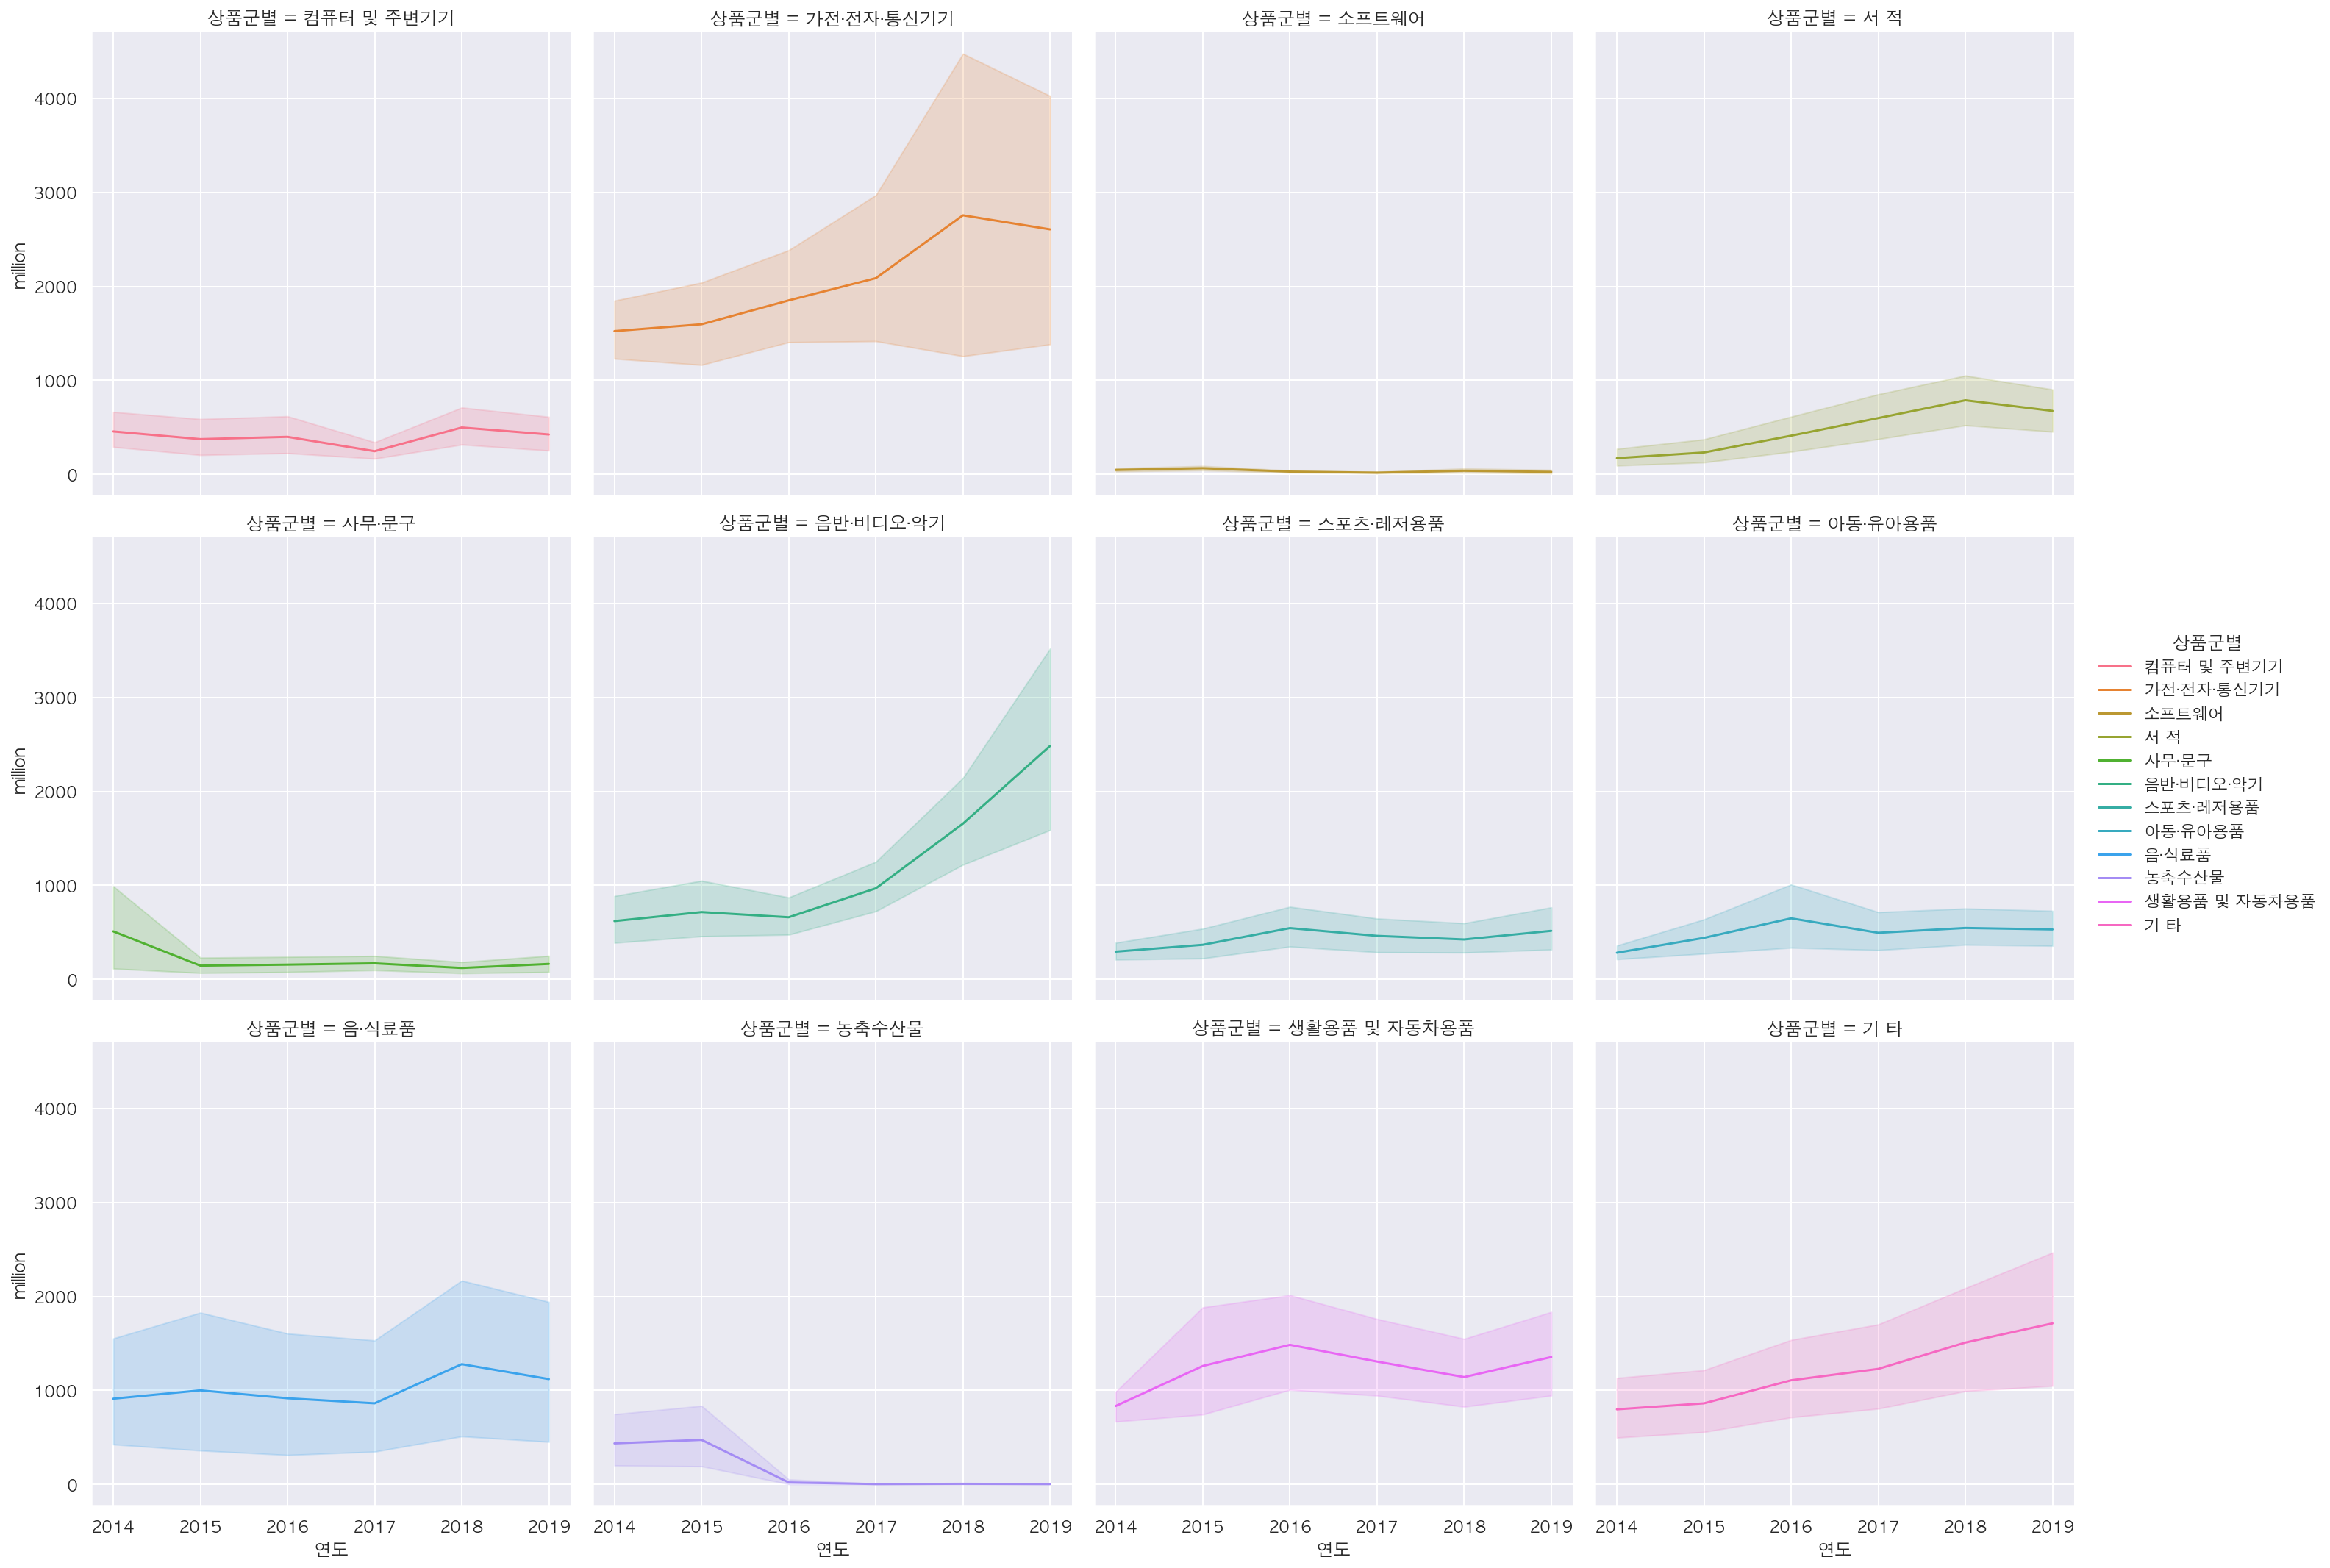

In [178]:
sns.relplot(data=df_sub, x="연도", y="million", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

### 화장품의 온라인쇼핑 해외직접판매액

In [180]:
df[(df["상품군별"] == "화장품")]

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
73,미국,화장품,면세점,2014 1/4,NaN,2014,1
74,미국,화장품,면세점 이외,2014 1/4,NaN,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
118,중국,화장품,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10738,대양주,화장품,면세점,2019 4/4,10.0,2019,4
10739,대양주,화장품,면세점 이외,2019 4/4,1084.0,2019,4
10782,기타,화장품,계,2019 4/4,17315.0,2019,4
10783,기타,화장품,면세점,2019 4/4,12513.0,2019,4


In [183]:
# df_comestic 이라는 변수에 상품군별이 화장품인 데이터만 가져오기
df_cosmetic = df[(df["상품군별"] == "화장품")].copy()
df_cosmetic.head()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

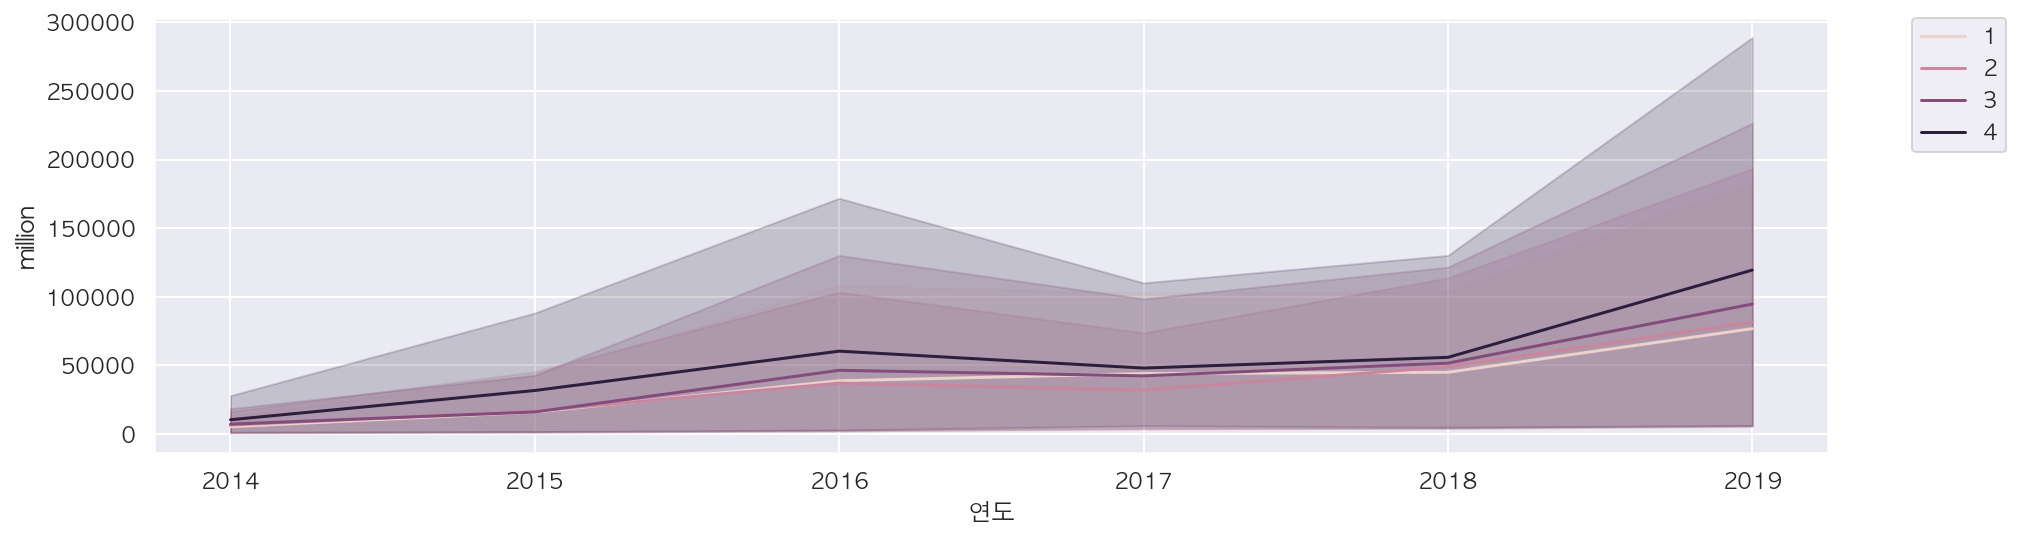

In [193]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 표현해 보기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="million", hue="분기")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [188]:
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
73,미국,화장품,면세점,2014 1/4,NaN,2014,1
74,미국,화장품,면세점 이외,2014 1/4,NaN,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
118,중국,화장품,면세점,2014 1/4,NaN,2014,1


<AxesSubplot:xlabel='기간', ylabel='million'>

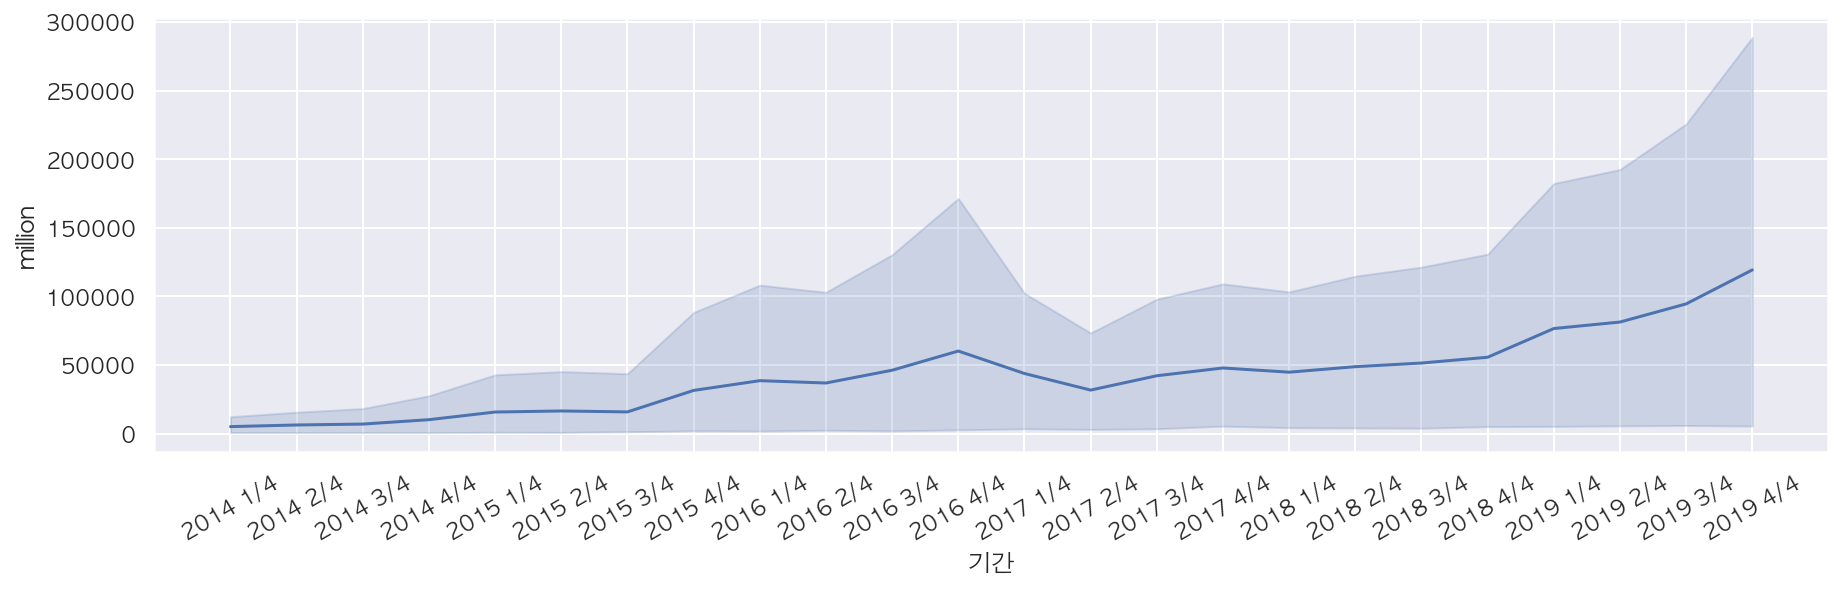

In [194]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million")

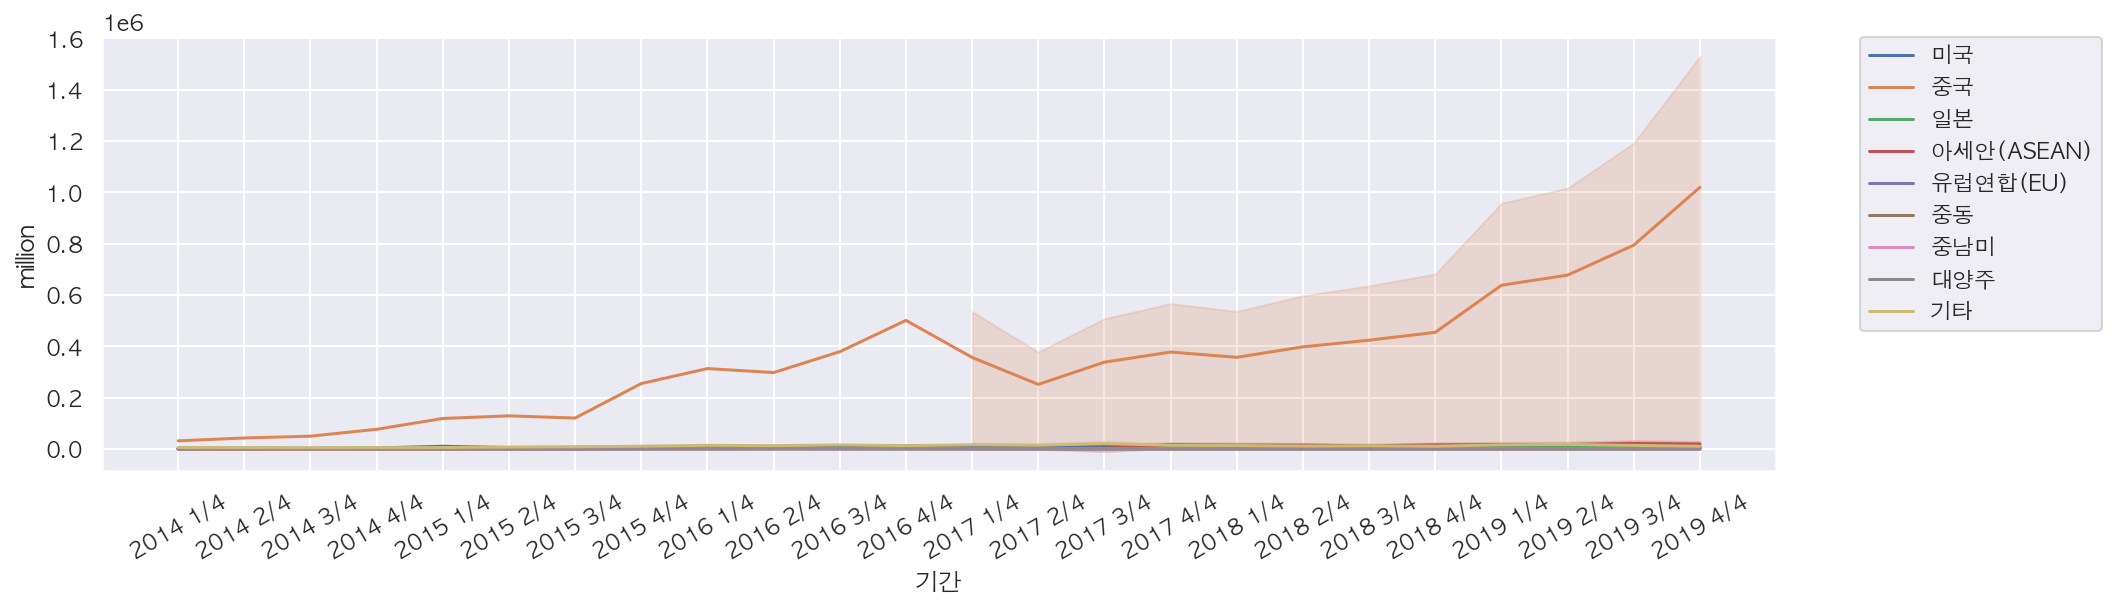

In [199]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="국가(대륙)별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

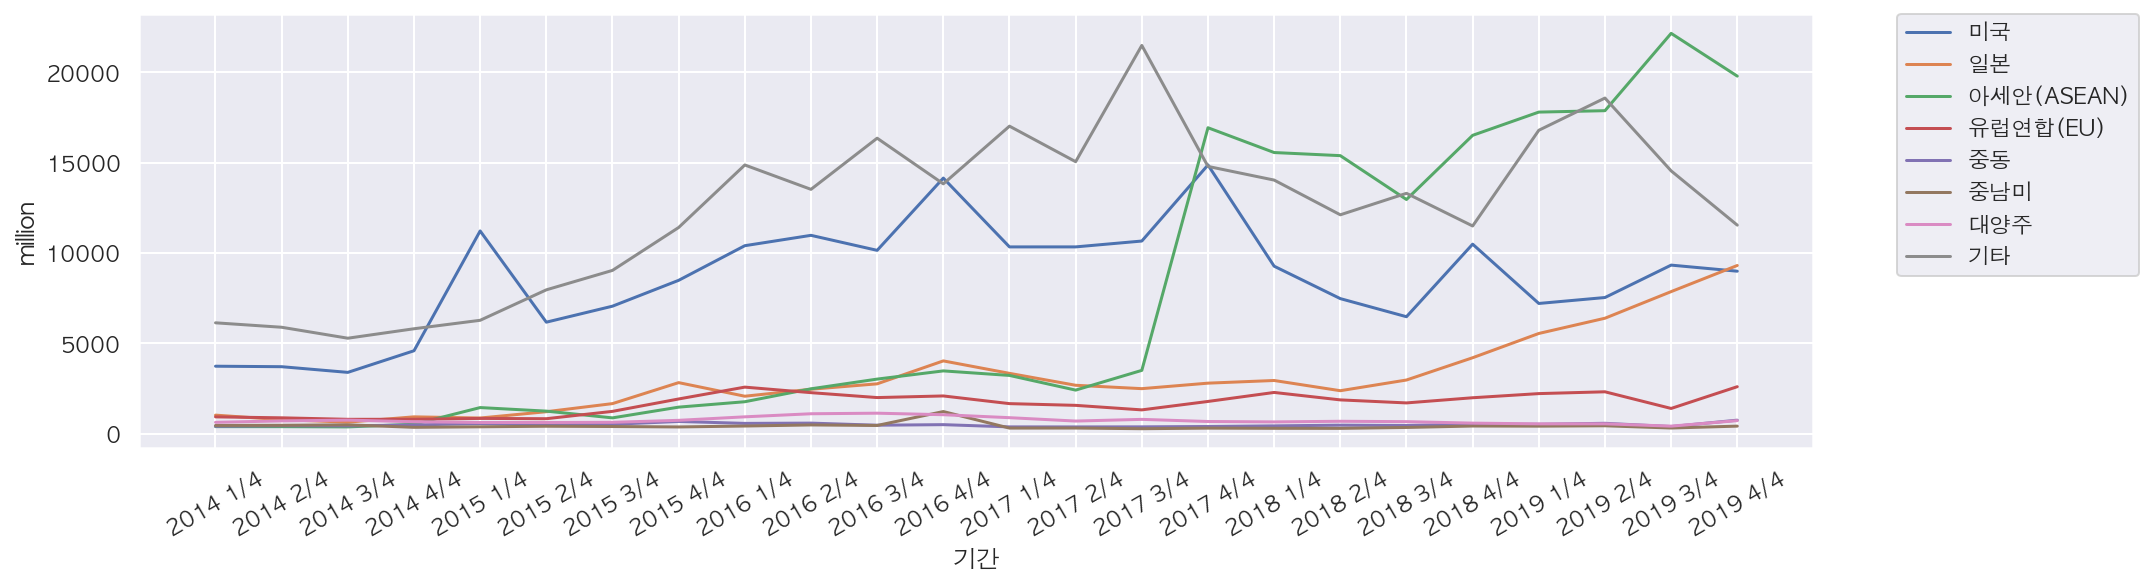

In [204]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="million", hue="국가(대륙)별", ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

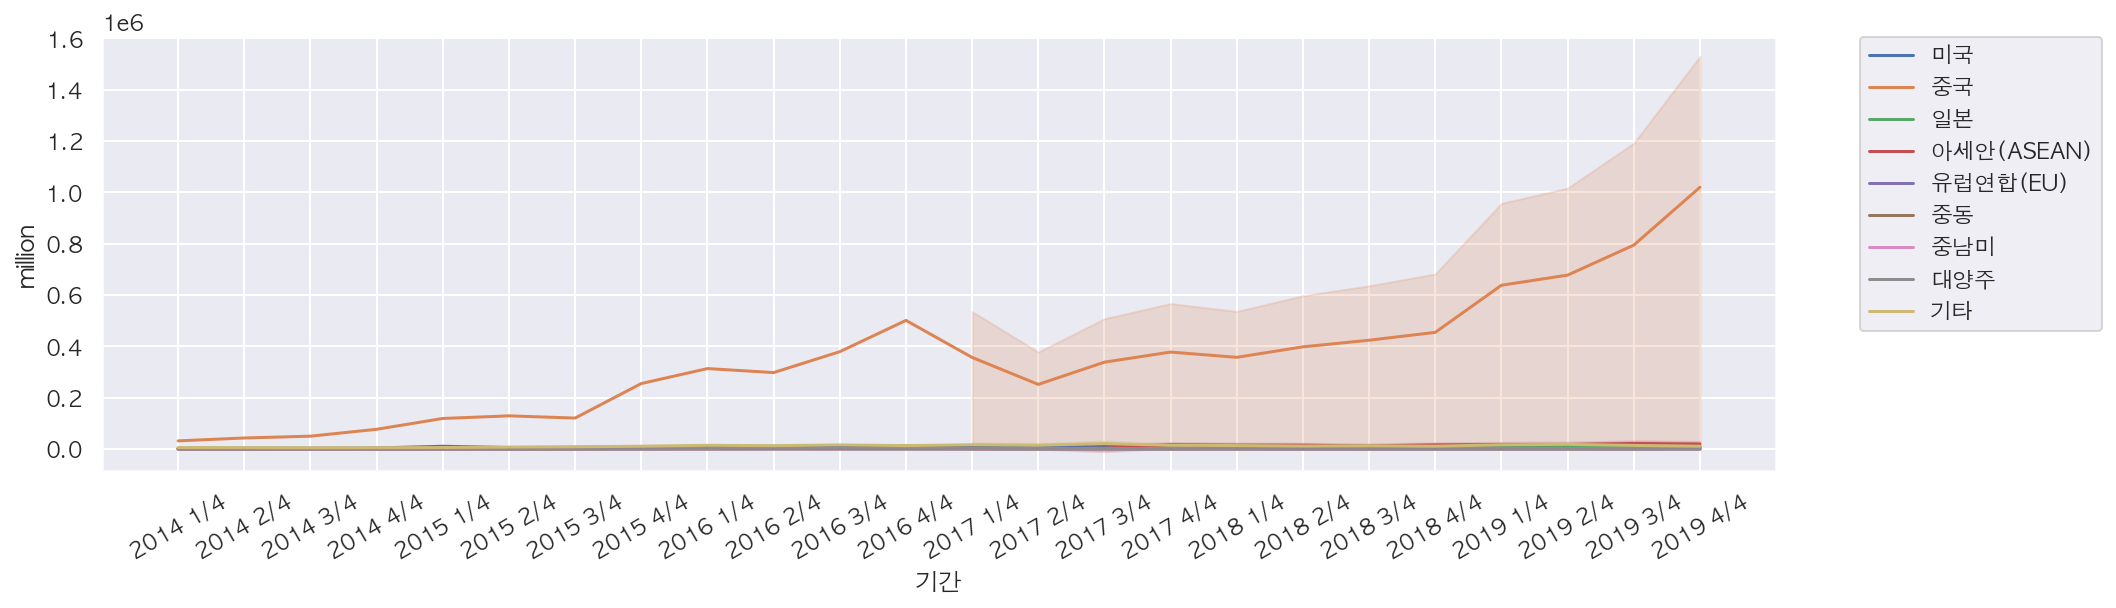

In [205]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="국가(대륙)별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [210]:
df_sub = df[(df["판매유형별"] != "계")].copy()
df_sub.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1


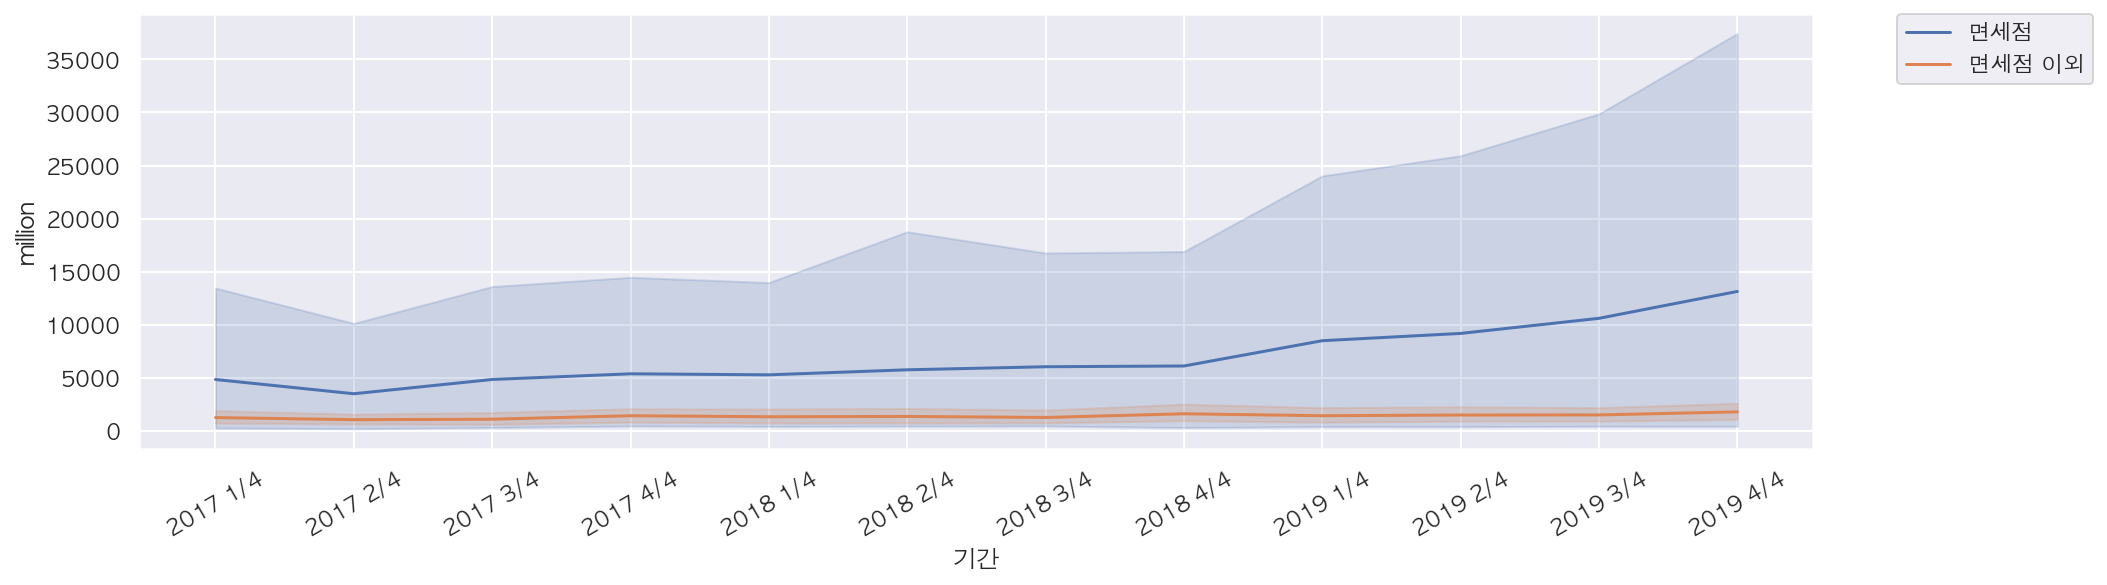

In [211]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "판매유형별"로 다른 색상으로 표시하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x="기간", y="million", hue="판매유형별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

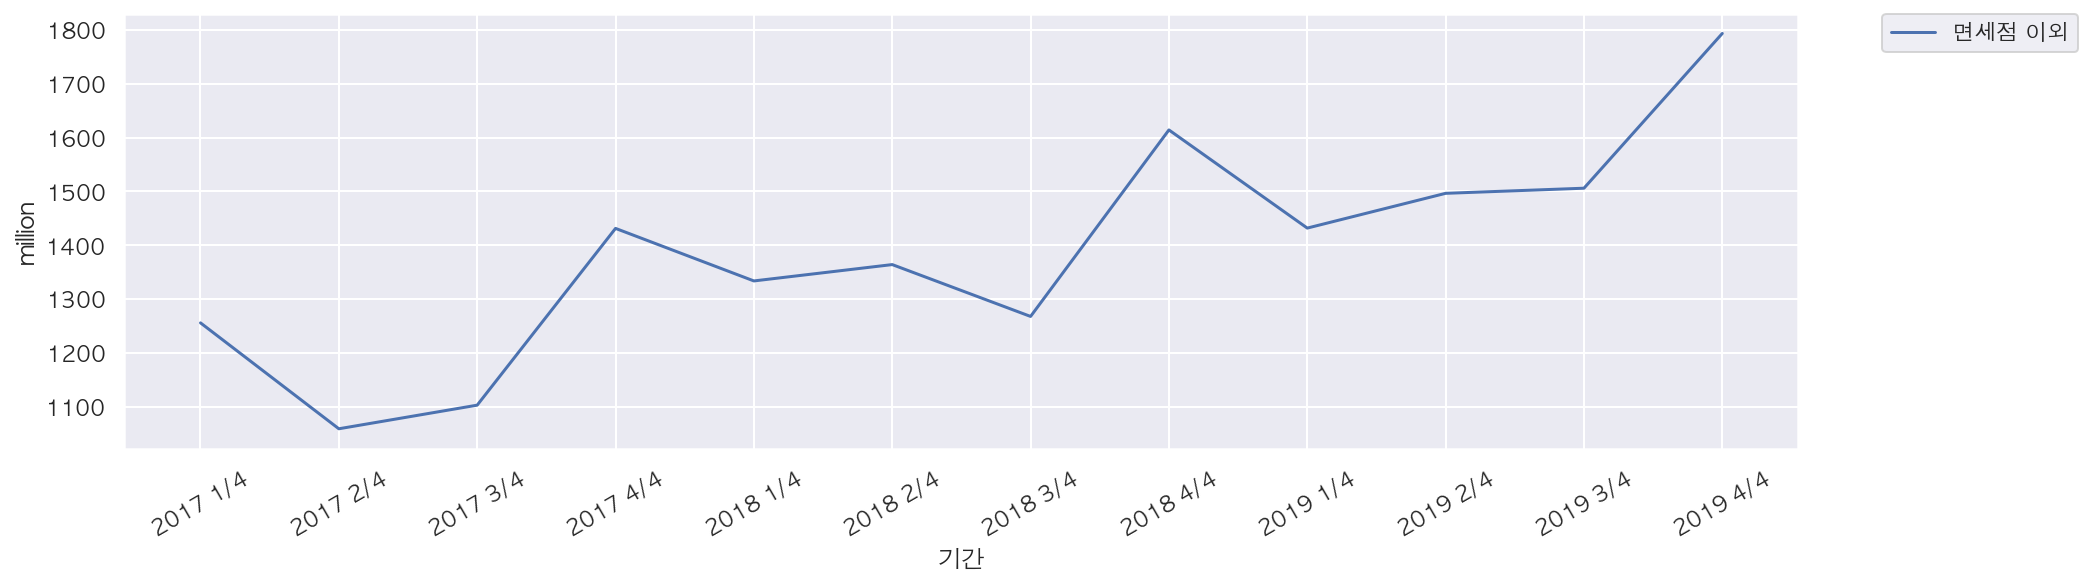

In [213]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub[df_sub["판매유형별"] != "면세점"], x="기간", y="million", hue="판매유형별", ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [219]:
# df_fashion 이라는 변수에 의류 데이터만 가져와 따로 담아주기
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


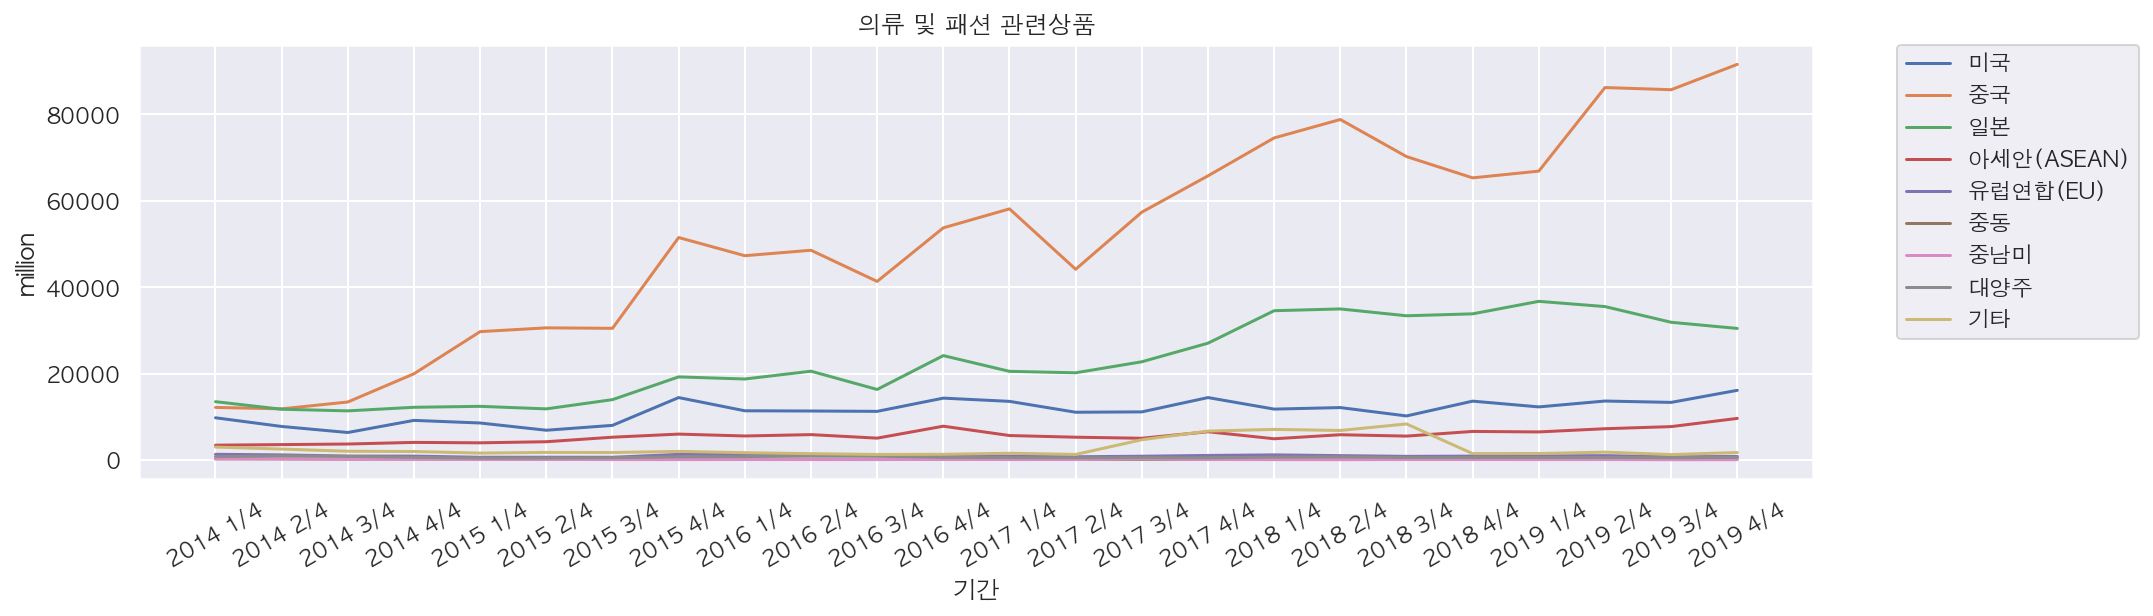

In [225]:
# "의류 및 패션 관련상품" 판매액에 대한 기간별 금액 데이터를 시각화하고 "국가(대륙)별"로 다른색상으로 표시하기
plt.figure(figsize=(15, 4))
plt.title("의류 및 패션 관련상품")
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="국가(대륙)별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

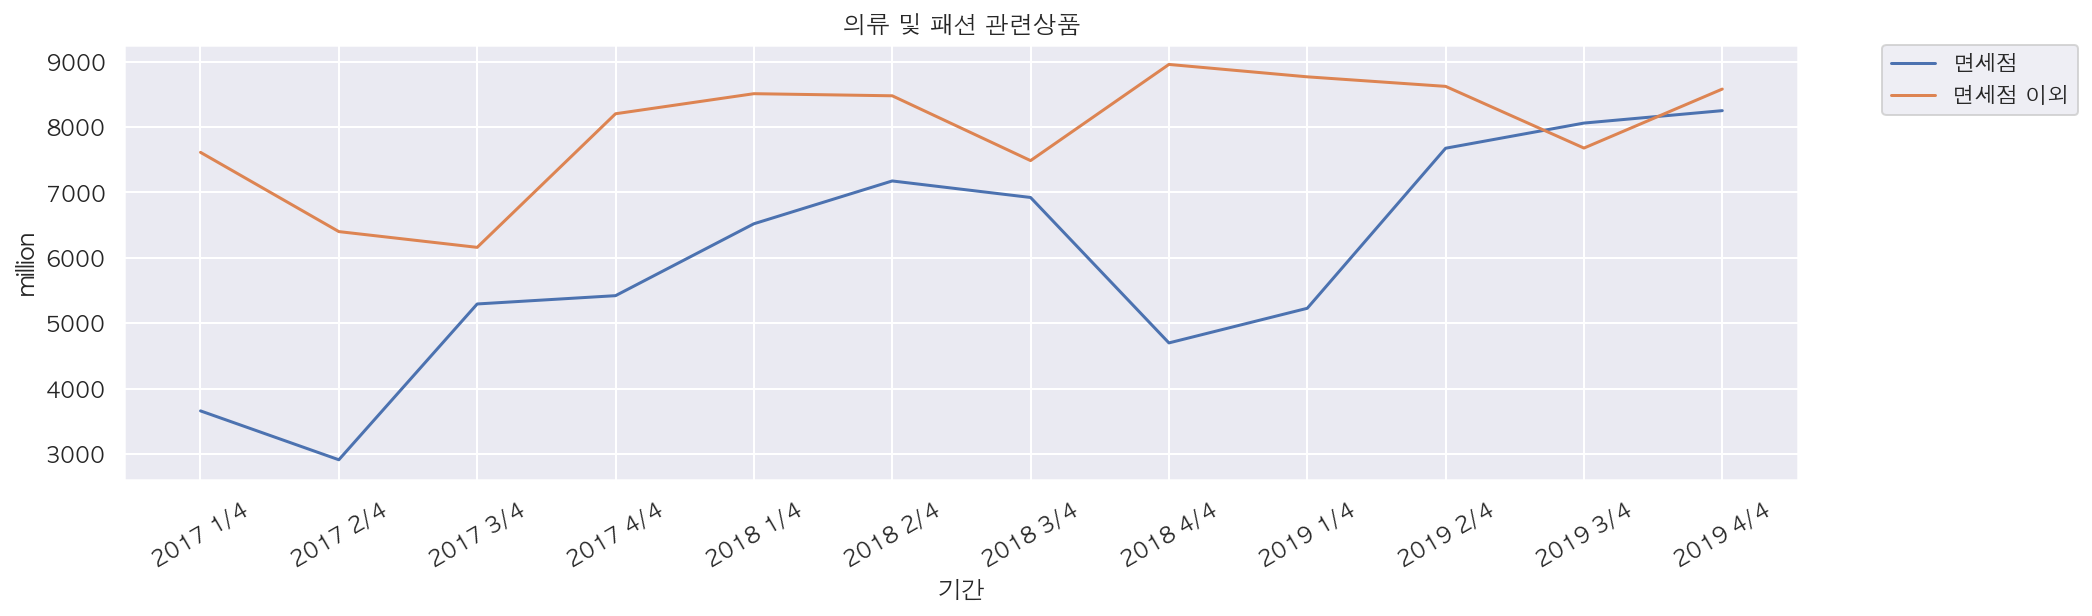

In [229]:
# "의류 및 패션 관련상품" 판매액에 대한 기간별 금액 데이터를 시각화하고 "판매유형별"로 다른색상으로 표시하기
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.title("의류 및 패션 관련상품")
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="million", hue="판매유형별", ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 데이터 집계하기

In [232]:
df_fashion["판매유형별"].value_counts()

계    216
Name: 판매유형별, dtype: int64

In [235]:
df_fashion.head(2)

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1


In [236]:
# 피벗테이블로 "국가(대륙)별", "연도"별 합계 금액을 표 형태로 구하기 
result = df_fashion.pivot_table(index="국가(대륙)별", values="million", columns="연도", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0


### 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

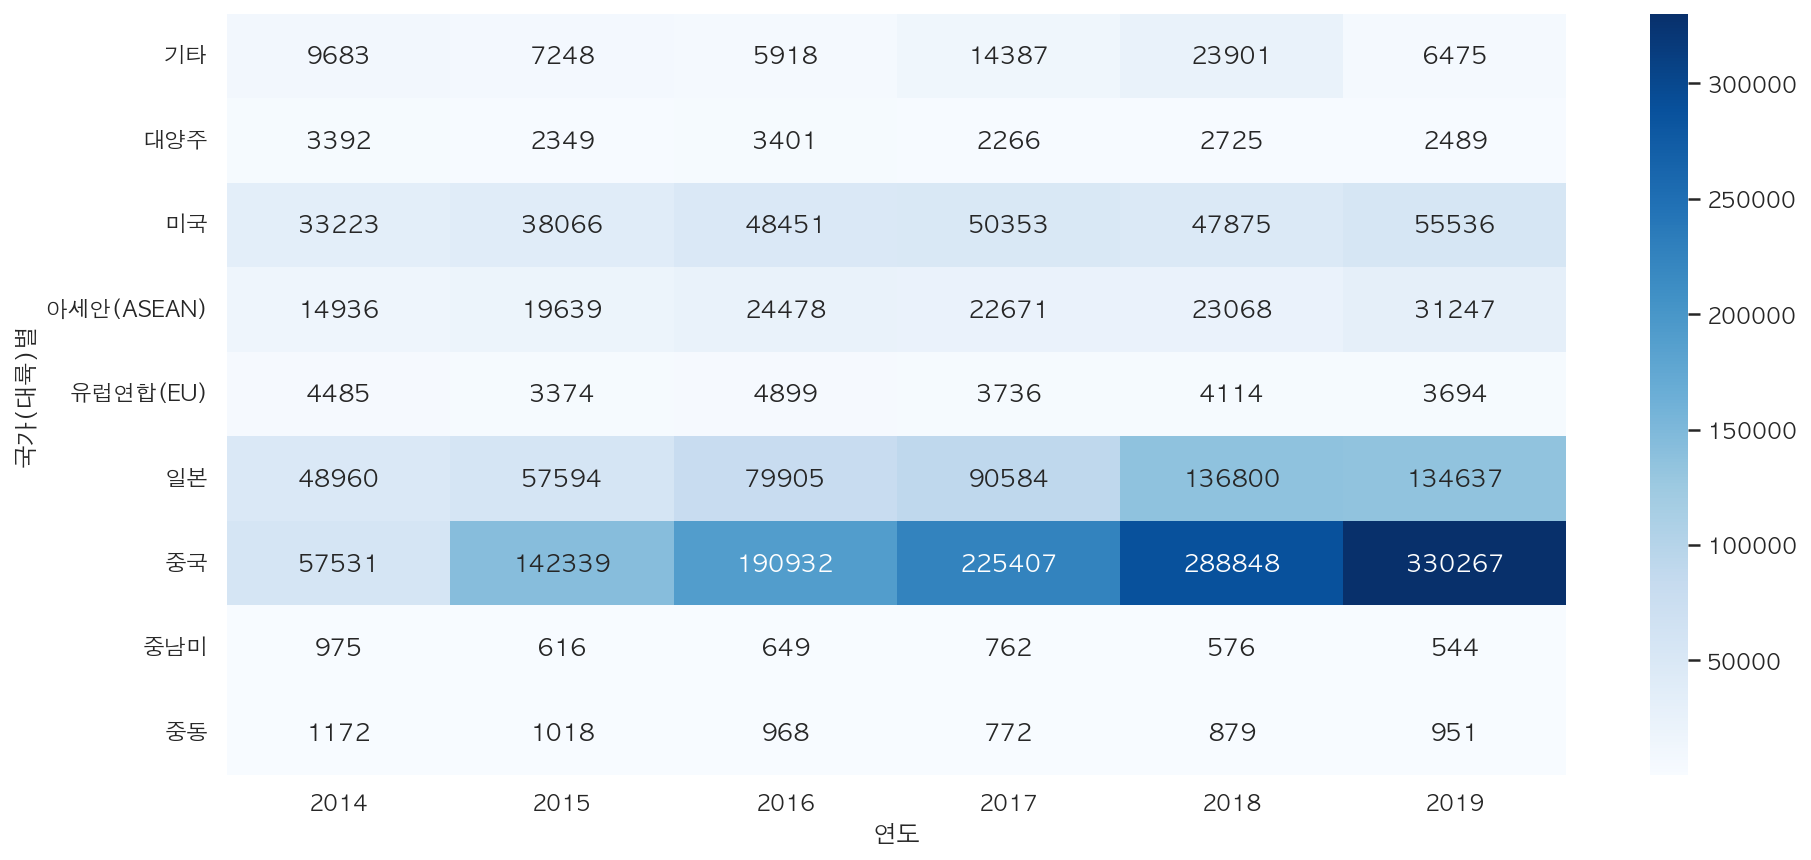

In [239]:
# 피벗테이블로 구한 결과의 값의 많고 적음에 따라 시각적으로 표현하기
plt.figure(figsize=(15, 7))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='million'>

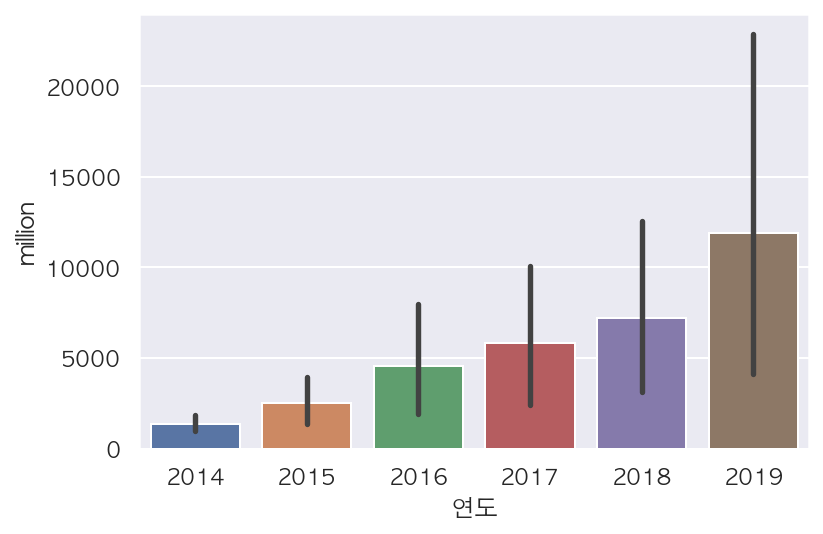

In [240]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화 하기
sns.barplot(data=df_total, x="연도", y="million")

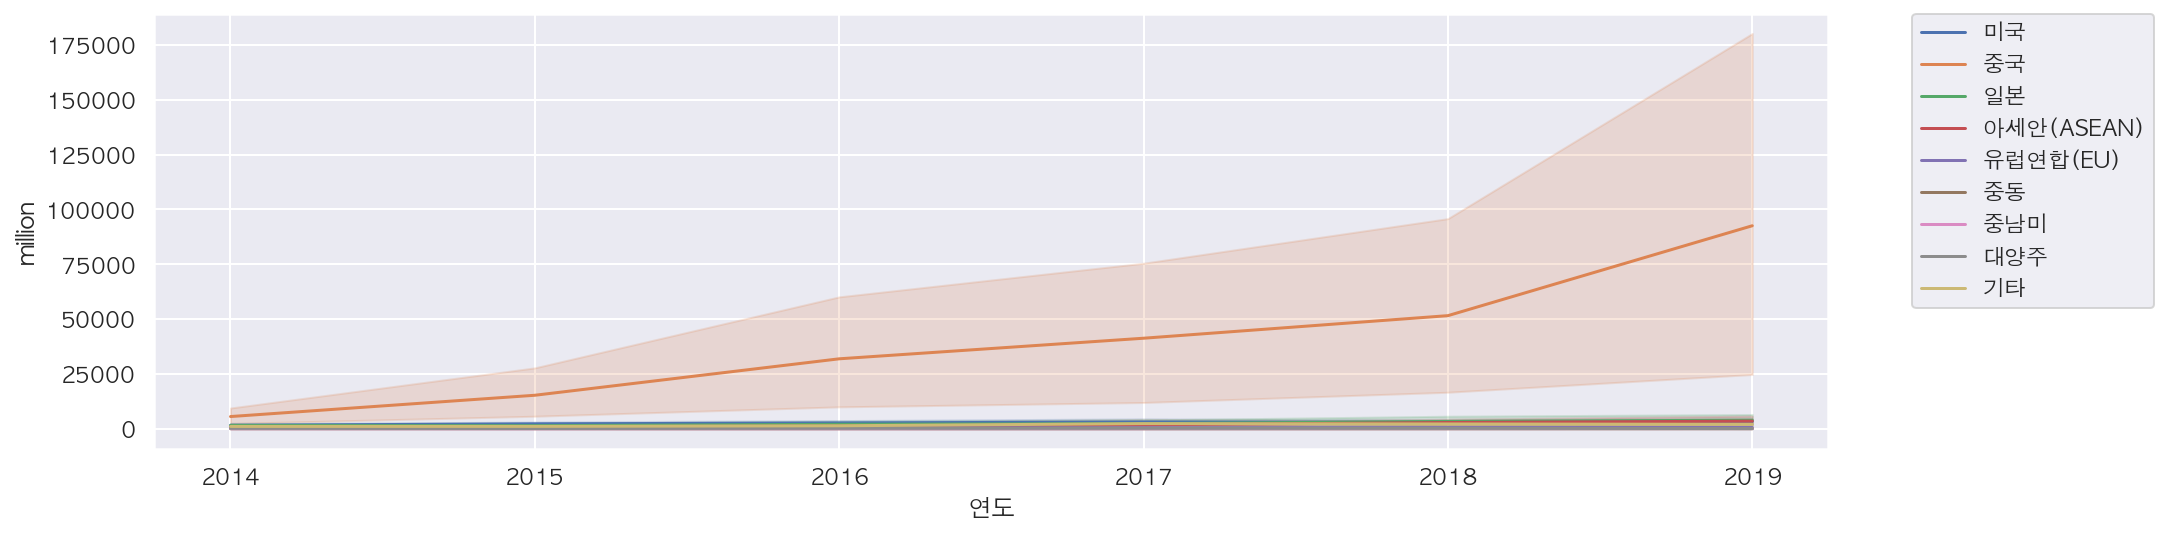

In [242]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="million", hue="국가(대륙)별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

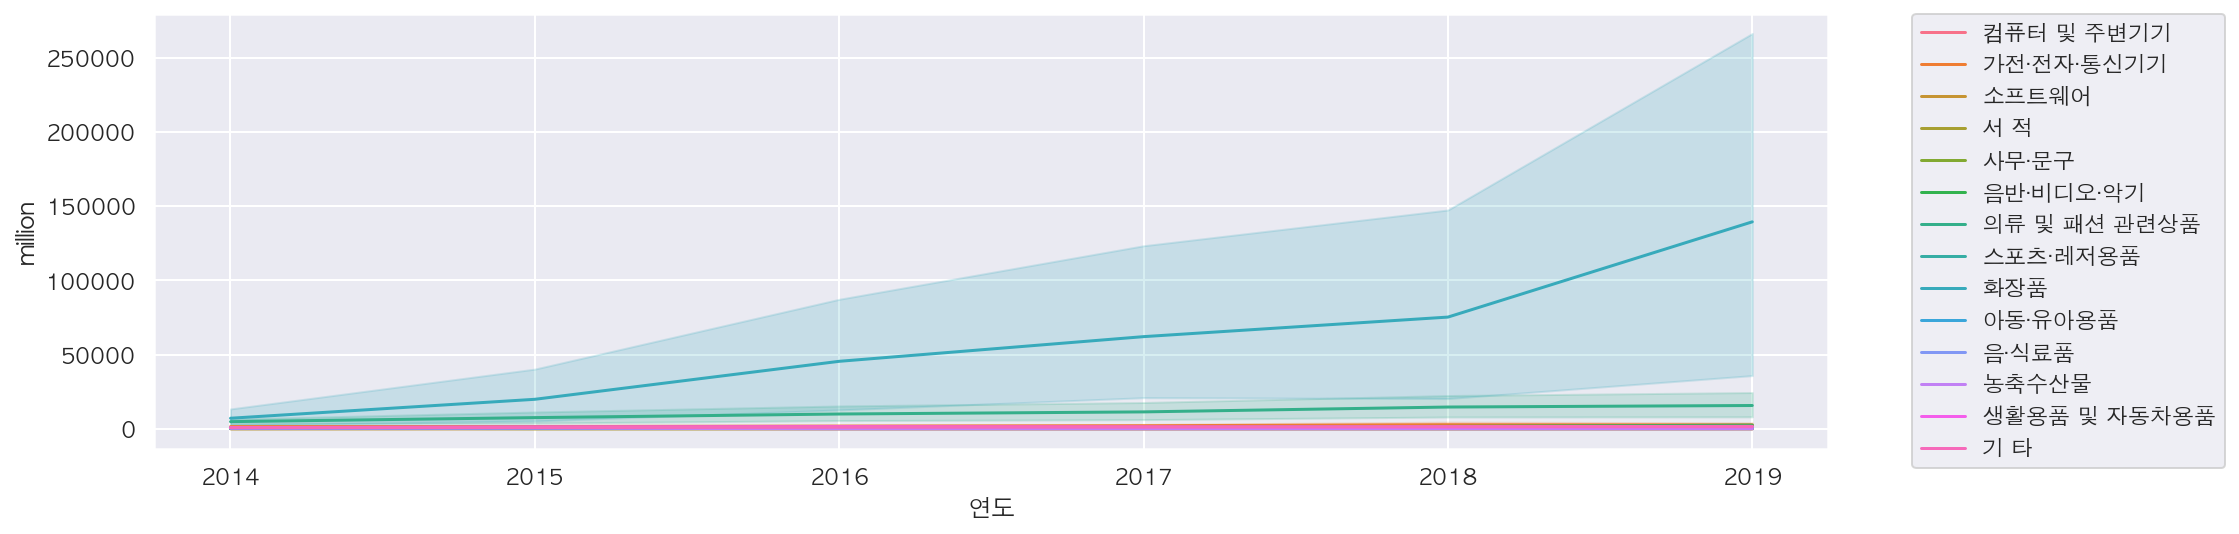

In [243]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="million", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)